# Basic usage of `plot_xy`

Here we demonstrate the basic usage of `plot_xy`, which plots variable y against x given a set of 2D data. Below we first import the module needed for showing images in the jupyter notebook.

In [1]:
from IPython.display import Image

Before we show some examples, let's first take a look at what arguments can be passed to `plot_xy`. In the example below, we assume that the user has been properly installed the package such that the command `plot_xy` is available.

In [2]:
%%bash
plot_xy -h

usage: plot_xy [-h] [-i INPUT [INPUT ...]] [-l LEGEND [LEGEND ...]]
               [-x XLABEL] [-y YLABEL] [-c COLUMN] [-t TITLE] [-n PNGNAME]
               [-cx {degree to radian,radian to degree,kT to kcal/mol,kcal/mol to kT,kT to kJ/mol,kJ/mol to kT,kJ/mol to kcal/mol,kcal/mol to kJ/mol,ns to ps,ps to ns}]
               [-cy {degree to radian,radian to degree,kT to kcal/mol,kcal/mol to kT,kT to kJ/mol,kJ/mol to kT,kJ/mol to kcal/mol,kcal/mol to kJ/mol}]
               [-fx FACTOR_X] [-fy FACTOR_Y] [-T TEMP] [-tr TRUNCATE]
               [-trb TRUNCATE_B] [-lc LEGEND_COL] [-d DIR] [-o OUTPUT]

This code plots variable y against x given a set of 2d data.

optional arguments:
  -h, --help            show this help message and exit
  -i INPUT [INPUT ...], --input INPUT [INPUT ...]
                        The filename(s) of the input(s). Wildcards can be
                        used.
  -l LEGEND [LEGEND ...], --legend LEGEND [LEGEND ...]
                        Legends of the curves. D

In the examples below, we use `HILLS_2D` and `fes_*.dat` in the folder `MD_plotting_toolkit/data` and `corrupted_HILLS` in the folder `MD_plotting_toolkit/tests/sample_inputs` as the example input data. 

## Example 1: TLDR - the possibly simplest command of `plot_xy`

We try to make `plot_xy` as user-friendly as possible such that the command of plotting a figure could be as simple as the one shown below. By default, `plot_xy` plots the second coumn against the first column. The default names of x- and y-axis are "X-axis" and "Y-axis", respectively. If the filename of the output image is not specified, `plot_xy` will automatically parse the input filename and name the output accordingly. In this case, with the input data filename as `HILLS_2D`, the output filename is `HILLS_2D.png`. In addition, some simple statistics of the data will be printed to the screen and stored in `results_HILLS_2D.txt` at the same time.

In [3]:
%%bash
hills=../../MD_plotting_toolkit/data/HILLS_2D  # just to shorten the command below
plot_xy -i ${hills}


Data analysis of the file: ../../MD_plotting_toolkit/data/HILLS_2D
- Working directory: /Users/Wei-TseHsu/Documents/Life in CU Bouler/Research in Shirts Lab/Code_development/GitHub/MD_plotting_toolkit/docs/examples
- Command line: /usr/local/bin/plot_xy -i ../../MD_plotting_toolkit/data/HILLS_2D
Analyzing the file ... 
Plotting and saving figure ...
Maximum of y: 3.140, which occurs at 2752.000.
Minimum of y: -3.138, which occurs at 1750.000.
Figure(640x480)


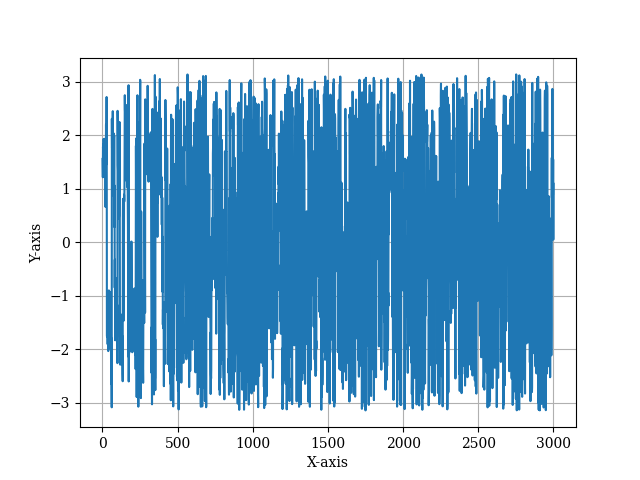

In [4]:
Image("HILLS_2D.png", width=400)

## Example 2: Making the figure as informative as possible

To specify the title, x-axis, y-axis, and the output filenames, we can use the following command. Note that the filename of the output text file can be speicified through the flat `-o`, or it will have the same name as the output figure but just with a different extension. For example, the following command generates `dihedral.png` and `results_dihedral_test.txt`, but if `-o` flag is not used the filename of the output text file would be `results_dihedral.txt`. Also, the output directory can be specified the flag `-d`. Here we just generate the outputs in the current working directory, which is the default of the flat `-d`.

In [5]:
%%bash
hills=../../MD_plotting_toolkit/data/HILLS_2D  # just to shorten the command below
plot_xy -i ${hills} -x "Time (ps)" -y "Dihedral angle (rad)" -t "Dihedral as a function of time" -n "dihedral" -o "results_dihedral_test.txt" -d '.'


Data analysis of the file: ../../MD_plotting_toolkit/data/HILLS_2D
- Working directory: /Users/Wei-TseHsu/Documents/Life in CU Bouler/Research in Shirts Lab/Code_development/GitHub/MD_plotting_toolkit/docs/examples
- Command line: /usr/local/bin/plot_xy -i ../../MD_plotting_toolkit/data/HILLS_2D -x Time (ps) -y Dihedral angle (rad) -t Dihedral as a function of time -n dihedral -o results_dihedral_test.txt -d .
Analyzing the file ... 
Plotting and saving figure ...
The average of dihedral angle: -0.013 (RMSF: -137.457, max: 3.140, min: -3.138)
The maximum of dihedral angle occurs at 2752.000 ps.
The minimum of dihedral angle occurs at 1750.000 ps.
The dihedral angle (-0.009 rad) at 2321.000 ps is closet to the average.
Figure(640x480)


In [6]:
Image("dihedral.png", width=400)

FileNotFoundError: No such file or directory: 'dihedral.png'

FileNotFoundError: No such file or directory: 'dihedral.png'

<IPython.core.display.Image object>

## Example 3: Unit conversion, data scaling and truncation

Note that we are not restricted to treating the second column as the dependent variable. To plot another variable, we can use the flag `-c` to specify the corresponding column index (starting from 0). For example, we can plot the Gaussian height (the sixth column) as a function of time using the following command.

In [7]:
%%bash
hills=../../MD_plotting_toolkit/data/HILLS_2D  # just to shorten the command below
plot_xy -i ${hills} -x "Time (ns)" -cx "ps to ns" -y "Gaussian height (kT)" -cy "kJ/mol to kT" -n "hills" -c 5


Data analysis of the file: ../../MD_plotting_toolkit/data/HILLS_2D
- Working directory: /Users/Wei-TseHsu/Documents/Life in CU Bouler/Research in Shirts Lab/Code_development/GitHub/MD_plotting_toolkit/docs/examples
- Command line: /usr/local/bin/plot_xy -i ../../MD_plotting_toolkit/data/HILLS_2D -x Time (ns) -cx ps to ns -y Gaussian height (kT) -cy kJ/mol to kT -n hills -c 5
Analyzing the file ... 
Plotting and saving figure ...
The average of gaussian height: 0.615 (RMSF: 0.294, max: 1.023, min: 0.260)
The maximum of gaussian height occurs at 0.001 ns.
The minimum of gaussian height occurs at 2.979 ns.
The gaussian height (0.615 kT) at 0.612 ns is closet to the average.
Figure(640x480)


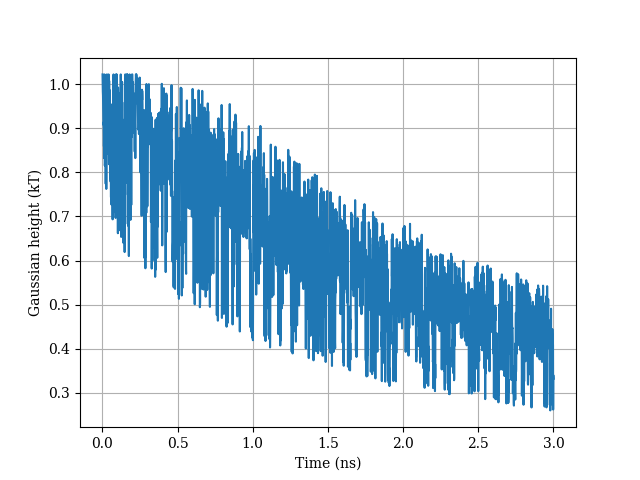

In [8]:
Image("hills.png", width=400)

Note that in the command above, the flags `-cx` and `-cy` were used to convert the units of variable x and y, respectively. If the unit conversion involves $k_{B}T$, the temperature can be specified through the flag `-T`. By deffault, the temperature is set at 298.15 K. Check the help message for the available unit conversions. If the wanted unit conversions is not available in the list, the user can consider using the flags `-fx` and `-fy` to scale the data of x- or y-data. 

As a example, it is well-known that in the PLUMED HILLS file, the documented data of Gaussian heights was multiplied by a factored related to the bias factor, which is 10/9 in this case. Therefore, to recover the real height as a function of time, we need to scale the data of y-variable by 0.9, which can be done by the following command.

In [9]:
%%bash
hills=../../MD_plotting_toolkit/data/HILLS_2D  # just to shorten the command below
plot_xy -i ${hills} -x "Time (ns)" -cx "ps to ns" -y "Gaussian height (kT)" -cy "kJ/mol to kT" -n "hills_scaled" -c 5 -fy 0.9 -tr 10 -trb 10


Data analysis of the file: ../../MD_plotting_toolkit/data/HILLS_2D
- Working directory: /Users/Wei-TseHsu/Documents/Life in CU Bouler/Research in Shirts Lab/Code_development/GitHub/MD_plotting_toolkit/docs/examples
- Command line: /usr/local/bin/plot_xy -i ../../MD_plotting_toolkit/data/HILLS_2D -x Time (ns) -cx ps to ns -y Gaussian height (kT) -cy kJ/mol to kT -n hills_scaled -c 5 -fy 0.9 -tr 10 -trb 10
Analyzing the file ... 
Plotting and saving figure ...
The average of gaussian height: 0.545 (RMSF: 0.261, max: 0.901, min: 0.248)
The maximum of gaussian height occurs at 0.395 ns.
The minimum of gaussian height occurs at 2.687 ns.
The gaussian height (0.545 kT) at 1.253 ns is closet to the average.
Figure(640x480)


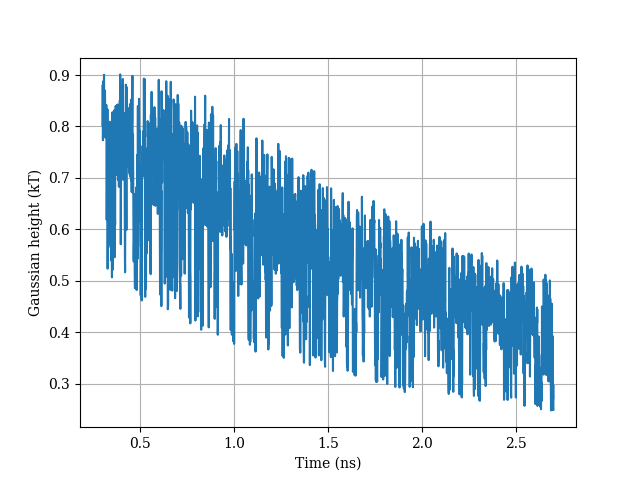

In [10]:
Image("hills_scaled.png", width=400)

Note that in the command above, flags `-tr` and `-trb` were used to truncate the first and last 10% of the time sereis, respectively, so the range of the x-axis was from 0.2 to 2.7 ns. The data analysis were also based on this truncated time series. 

## Example 4: Plotting multiple datasets in one figure

`plot_xy` can also plot multiple datasets in on figure given multiple input files. Specifically, one can pass multiple filenames through the flag `-i` or use a wildcard as below. To make the figure more informative, one can specify the legends (using the flag `-l`) of each curve and decide how the legends should be arranged (using the flag `lc`), as shown below.

In [11]:
%%bash
fes=../../MD_plotting_toolkit/data/fes_*.dat  # just to shorten the command below
plot_xy -i ${fes} -l "Trial 1" "Trial 2" "Trial 3" "Trial 4" -x "The number of water molecules" -y "Free energy (kT)" -cy "kJ/mol to kT" -n "fes_water"


Data analysis of the file: ../../MD_plotting_toolkit/data/fes_1.dat
- Working directory: /Users/Wei-TseHsu/Documents/Life in CU Bouler/Research in Shirts Lab/Code_development/GitHub/MD_plotting_toolkit/docs/examples
- Command line: /usr/local/bin/plot_xy -i ../../MD_plotting_toolkit/data/fes_1.dat ../../MD_plotting_toolkit/data/fes_2.dat ../../MD_plotting_toolkit/data/fes_3.dat ../../MD_plotting_toolkit/data/fes_4.dat -l Trial 1 Trial 2 Trial 3 Trial 4 -x The number of water molecules -y Free energy (kT) -cy kJ/mol to kT -n fes_water
Analyzing the file ... 
Plotting and saving figure ...
Maximum of free energy: 197.913 kT, which occurs at 32.968.
Minimum of free energy: 0.000 kT, which occurs at 2.807.

Data analysis of the file: ../../MD_plotting_toolkit/data/fes_2.dat
- Working directory: /Users/Wei-TseHsu/Documents/Life in CU Bouler/Research in Shirts Lab/Code_development/GitHub/MD_plotting_toolkit/docs/examples
- Command line: /usr/local/bin/plot_xy -i ../../MD_plotting_toolkit/da

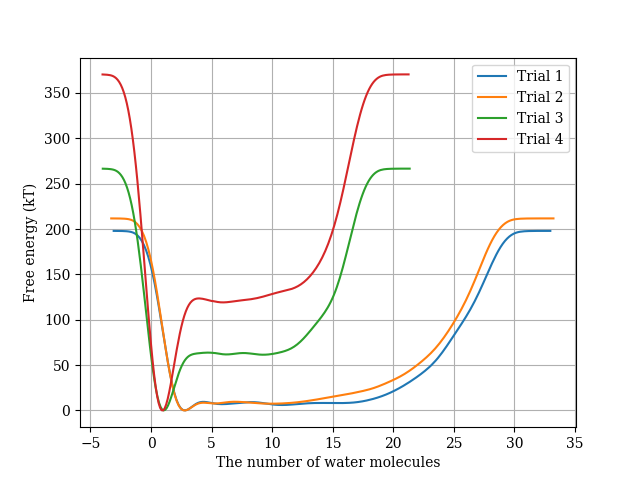

In [12]:
Image("fes_water.png", width=400)

## Example 5: `plot_xy` can possibly deal with corrupted files

One of the great things about `plot_xy` is that it is able to deal with corrupted files, which commonly happens in files generated on-the-fly during a simulation. Specifically, once the simulation stopped due to timeout or any crashing issue before reaching the expected length, such files would have corrupted lines. For most of the times, if the simulation is extended, it is not extended from exactly where it was terminated previously but the latest checkpoint, which can cause overlapped time frames that we should deal with carefully.

As an example, below is a part of content of a corrupted HILLS file. The file was being generating in a simulation that stopped at 1380 ps but was extended from 1310 ps, which was the last checkpoint when the extension was carried out. 

In [13]:
%%bash
awk 'FNR>=1383 && FNR<=1392' ../../MD_plotting_toolkit/tests/sample_inputs/corrupted_HILLS

      1378.000065451488      1.046477956991033                      7                    0.5                 0.0001      1.458510349473039                     45
      1379.000065498985     -2.781130179262929                      7                    0.5                 0.0001      1.764332823424748                     45
      1380.000065546483    -0.8263923379150779                      7                    0.5                 0.0001      1.564131548663746                     45
#! FIELDS time theta lambda sigma_theta sigma_lambda height biasf
#! SET multivariate false
#! SET kerneltype gaussian
#! SET min_theta -pi
#! SET max_theta pi
      1310.000062221661     0.3290213824650792                      1                    0.5                 0.0001      1.494458141471088                     45
      1311.000062269159    -0.8657328832616118                      2                    0.5                 0.0001      1.473333762904016                     45


Therefore, when read by `plumed.read_as_pandas` internally in `data_processing.read_2d_data` (which is used in `plot_xy`), the time sereis would have overalpped time frames between 1310 to 1380 ps. This is automatically tackled internally in `plot_xy` by `data_processing.deduplicate_data` such as the later occurence of the overlapped time frames is kept.

In [14]:
import plumed
data = plumed.read_as_pandas('../../MD_plotting_toolkit/tests/sample_inputs/corrupted_HILLS')
data.iloc[1375:1385]

<ipython-input-14-07b03cbb0980>:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  data = plumed.read_as_pandas('../../MD_plotting_toolkit/tests/sample_inputs/corrupted_HILLS')


,time,theta,lambda,sigma_theta,sigma_lambda,height,biasf
1375,1376.000065,-2.317805,7,0.5,0.0001,1.561005,45
1376,1377.000065,2.072658,7,0.5,0.0001,1.462195,45
1377,1378.000065,1.046478,7,0.5,0.0001,1.458510,45
1378,1379.000065,-2.781130,7,0.5,0.0001,1.764333,45
1379,1380.000066,-0.826392,7,0.5,0.0001,1.564132,45
1380,1310.000062,0.329021,1,0.5,0.0001,1.494458,45
1381,1311.000062,-0.865733,2,0.5,0.0001,1.473334,45
1382,1312.000062,-0.535264,1,0.5,0.0001,1.446002,45
1383,1313.000062,-0.323373,1,0.5,0.0001,1.493307,45
1384,1314.000062,0.390707,0,0.5,0.0001,1.213714,45


As such, we can confidentlly plot a file even if it is corrupted. 

In [15]:
%%bash
corrupted_hills=../../MD_plotting_toolkit/tests/sample_inputs/corrupted_HILLS
plot_xy -i ${corrupted_hills} -x "Time (ps)" -y "Gaussian height (kJ/mol)" -c 5 -n "hills_corrupted"


Data analysis of the file: ../../MD_plotting_toolkit/tests/sample_inputs/corrupted_HILLS
- Working directory: /Users/Wei-TseHsu/Documents/Life in CU Bouler/Research in Shirts Lab/Code_development/GitHub/MD_plotting_toolkit/docs/examples
- Command line: /usr/local/bin/plot_xy -i ../../MD_plotting_toolkit/tests/sample_inputs/corrupted_HILLS -x Time (ps) -y Gaussian height (kJ/mol) -c 5 -n hills_corrupted
Analyzing the file ... 
Plotting and saving figure ...
The average of gaussian height: 1.381 (RMSF: 0.384, max: 2.535, min: 0.534)
The maximum of gaussian height occurs at 1.000 ps.
The minimum of gaussian height occurs at 2931.000 ps.
The gaussian height (1.380 kJ/mol) at 1157.000 ps is closet to the average.
Figure(640x480)


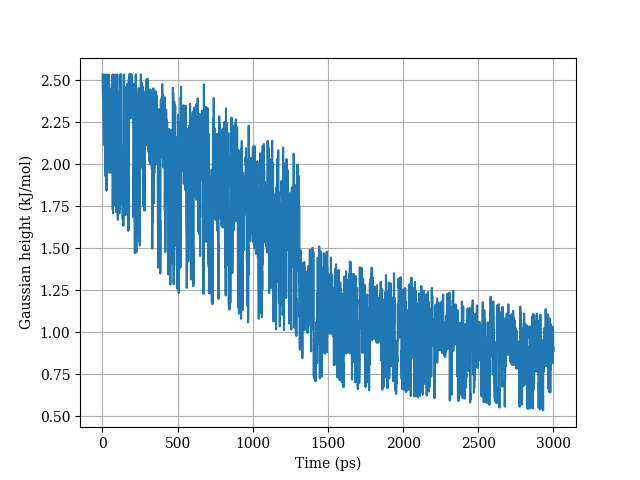

In [16]:
Image("hills_corrupted.png", width=400)

---
Below we delete the output files to make the repository as lightweight as possible.

In [17]:
import os, glob
files = glob.glob('*.png')
files.extend(glob.glob('*txt'))
for i in files:
    os.remove(i)